# Desempenho Escolar de Alunos do Último Ano do Ensino Médio.

# Objetivo
Irei analisar dados de escolas de todas as regiões do Brasil para concluir quais fatores são mais importantes para um melhor desempenho escolar dos estudantes brasileiros no ano de conclusão do ensino básico.

Esta análise atende dois objetivos pessoais meus:
* Contribuir com a ciência de dados para o bem social (Do inglês *Data Science For Social Good* ou DSSG). DSSG é uma iniciativa descrentralizada onde cientistas de dados, tanto profissionais como amadores, buscam cotribuir positivamente na sociedade usando suas habiidades. Você pode conhecer mais sobre DSSG [neste artigo](https://towardsdatascience.com/using-data-science-for-social-good-c654a6580484) escrito pela Paulina Zheng: 
* Aprender com a prática. Eu acredito que a melhor forma de desenvolver e consolidar um conhecimento seja realizando. Através desse projeto pretendo práticar Python e ciência de dados.

# Ferramentas e Metodologia 
## Google Colaboratory
[Colaboratory](https://research.google.com/colaboratory/faq.html) é o Jupyter Notebook do Google. Não é necessário nenhuma instalação para seu uso e totalmente integrado ao Google Drive. O Colaboratory se destaca por já ter as principais bibliotecas instaladas e oferecer GPU gratuitamente.

# Conjunto de Dados

## INEP
O [Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP)](http://inep.gov.br/web/guest/inicio) é uma autarquia federal vinculada ao Ministério da Educação (MEC). Sua missão é  subsidiar a formulação de políticas educacionais dos diferentes níveis de governo com intuito de contribuir para o desenvolvimento econômico e social do país.

Do portal do INEP foi utilizado:
* [Exame Nacional do Ensino Médio (ENEM) 2010](http://portal.inep.gov.br/microdados)

## Portal Brasileiro de Dados Abertos
O [Portal Brasileiro de Dados Abertos](http://dados.gov.br/pagina/sobre) é a ferramenta disponibilizada pelo governo para que todos possam encontrar e utilizar os dados e as informações públicas. O portal preza pela simplicidade e organização para que você possa encontrar facilmente os dados e informações que precisa. O portal também tem o objetivo de promover a interlocução entre atores da sociedade e com o governo para pensar a melhor utilização dos dados, promovendo impactos positivos sob os pontos de vista social e econômico.

Do Portal Brasileiro de Dados Abertos foram utilizados:
* [Taxas de Rendimento Escolar na Educação Básica](http://dados.gov.br/dataset/taxas-de-rendimento-escolar-na-educacao-basica)
* [Média de Alunos por Turma na Educação Básica](http://dados.gov.br/dataset/media-de-alunos-por-turma-na-educacao-basica)
* [Média de Horas-Aula diária na Educação Básica](http://dados.gov.br/dataset/media-de-horas-aula-diaria-na-educacao-basica)
* [Taxas de distorção idade-série Escolar na Educação Básica](http://dados.gov.br/dataset/taxas-de-distorcao-idade-serie-escolar-na-educacao-basica)

Note que apesar de retirados do Portal Brasileiro de Dados Abertos, todos os dados são de origem do INEP.


# Bibliotecas
Se você não está acostumado a usar o Google Colaboratory não deve estar familiarizado com o módulo `google.colab`. Precisamos dele para acessar o dados do Drive.

In [1]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 921kB 2.9MB/s 
     |████████████████████████████████| 10.1MB 42.0MB/s 
     |████████████████████████████████| 11.8MB 199kB/s 


In [0]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import missingno as msno
import geopandas
import descartes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
# Only applicable for Google Colab notebook.
from google.colab import drive

# Configs

# Pandas
# Don't show chained assignment warnings.
pd.options.mode.chained_assignment = None 

# Matplotlib
# Plot inline.
%matplotlib inline

# Seaborn
# Palette for diverging visualizations.
div_pal = 'RdYlGn'
# Palette for sequential visualizations.
seq_pal = 'viridis'
# Palette for categorical visualizations.
cat_pal = 'viridis'

# Importando os Conjunto de Dados
Para acessar os arquivos precisamos usar a função `mount` da biblioteca do Googe Colab.

In [3]:
# Only applicable for Google Colab notebook.
drive.mount('/content/gdrive')
# This is the path for the data in my Google Drive, if trying to recreate the
# analysis, edit this path to your case.
gdrive = 'gdrive/My Drive/Code/Data Science For Social Good/Brazilian Basic Education'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


O primeiro conjunto de dados que importarei é o da taxa de rendimento escolar. É importante dar uma olhada nos dados para garantir que estão sendo importados corretamente.

A funcão `head_and_tail` oferece uma visualização compacta das primeiras e últimas linhas de  um conjunto de dados. Isso é importante para podermos inspecionar a importação dos dados sem poluir visualmente o notebook.

In [0]:
def head_and_tail(df, n_rows=5):
    # Instead of selecting the rows to be keeped, it is easier to drop the  ones
    # that shouldn't be keeped.
    return df.drop(df.index[n_rows:-n_rows])

In [5]:
df_rate = pd.read_excel(f'{gdrive}/source/tx_rendimento_escolas_2010_19082011.xls')
head_and_tail(df_rate, 10)

,Unnamed: 0,Unnamed: 1,Ministério da Educação,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,NaN,NaN,Instituto Nacional de Estudos e Pesquisas Educ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Taxa de Aprovação - 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taxa de Reprovação - 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taxa de Abandono - 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Taxa de Aprovação, segundo a Localização e a D...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Taxa de Reprovação, segundo a Localização e a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Taxa de Abandono, segundo a Localização e a ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ano,Região,UF,Código do Município,Nome do Município,Localização,Rede,Código da Escola,Nome da Escola,Aprovação no 1º Ano do Ensino Fundamental,Taxa de Aprovação - Ensino Fundamental de 8 e ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taxa de Aprovação - Ensino Médio,NaN,NaN,NaN,NaN,NaN,Taxa de Reprovação - Ensino Fundamental de 8 e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taxa de Reprovação - Ensino Médio,NaN,NaN,NaN,NaN,NaN,Taxa de Abandono - Ensino Fundamental de 8 e 9...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taxa de Abandono - Ensino Médio,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aprovação na 1ª série/2º Ano,Aprovação na 2ª série/3º Ano,Aprovação na 3ª série/4º Ano,Aprovaçãona 4ª série/5º Ano,Aprovação na 5ª série/6º Ano,Aprovação na 6ª série/7º Ano,Aprovação na 7ª série/8º Ano,Aprovação na 8ª série/9º Ano,Aprovação 1ª a 4ª Série/1º a 5º Ano,Aprovação 5ª a 8ª Série/ 6º ao 9º Ano,Total Aprovação Fundamental,Aprovação na 1ª série - Médio,Aprovação na 2ª série - Médio,Aprovação na 3ª série - Médio,Aprovação na 4ª série - Médio,Total Aprovação Médio Não Seriado,Total Aprovação Médio,Reprovação no 1º Ano do Ensino Fundamental,Reprovação na 1ª série/2º Ano,Reprovação na 2ª série/3º Ano,Reprovação na 3ª série/4º Ano,Reprovação na 4ª série/5º Ano,Reprovação na 5ª série/6º Ano,Reprovação na 6ª série/7º Ano,Reprovação na 7ª série/8º Ano,Reprovação na 8ª série/9º Ano,Reprovação 1ª a 4ª Série/1º a 5º Ano,Reprovação 5ª a 8ª Série/ 6º ao 9º Ano,Total Reprovação Fundamental,Reprovação na 1ª série - Médio,Reprovação na 2ª série - Médio,Reprovação na 3ª série - Médio,Reprovação na 4ª série - Médio,Total Reprovação Médio Não Seriado,Total Reprovação Médio,Abandono no 1º Ano

Aqui fica claro que a planilha contém diversas células mescladas, assim como linhas de rodapé, o que  faz com que linhas do cabeçalho e rodapé sejam interpretadas no lugar de dados. Também é possível perceber que valores nulos estão representados como `--` no conjunto de dados

A função `reader` tratará os dados de forma que o conjunto de dados fique em formato amigável para ser usado pelo pandas.

In [0]:
def reader(file, skipheader, header, skipfooter):
    # loads an excel file
    dic = pd.read_excel(
                        # File name
                        file, 
                        # Sheet name, when None, reads all sheets.
                        sheet_name = None, 
                        # Rows to be skipped from the beginning.
                        skiprows = list(range(skipheader)),  
                        # Header rows, after the skipped ones.
                        header = header, 
                        # Rows to be skipped from the ending.
                        skipfooter = skipfooter, 
                        # How NaN are in the dataset
                        na_values = '--'
                        ) 
    # creates an empty list where all the sheets data will be stored
    frames = []
    # when the function the attribute sheet_name from the method read_excel is
    # set to None, it reads all the sheets and return a dictionary with the name
    # of the sheet as key, and the dataframe as item. For my analisys the
    # name of the key is not important to us, but just the dataframe.
    for key, df in dic.items():
        # The list new_columns is where the new columns names is stored
        new_columns = []
        # Since the cells are not always merged in the same way, it is not well 
        # defined which is the one that better describe the column. So we check 
        # which columns names that are not 'Unnamed' and if there's more than 
        # one columns that aren't 'Unnamed, we assume that the later is the one 
        # that best describe it.
        for names in df.columns:
            for n in (names):
                if not 'Unnamed' in n:
                    new_name = n
            new_columns.append(new_name)
        # Deletes the multiple columns names.
        df.columns.droplevel()
        # And then attributes the list we've created to the columns names
        df.columns = new_columns
        # Append the threaded list to the frames list
        frames.append(df)

    # Before returning, we concatenate all the dataframes in a single one.
    return pd.concat(frames, ignore_index=True, sort=False)

Agora finalmente posso importar o conjunto de dados da taxa de rendimento e verificar que agora os dados foram importados corretamente.

In [7]:
# Loads the dataset.
df_rate = reader(f'{gdrive}/source/tx_rendimento_escolas_2010_19082011.xls', 
            6, [0,1], 5)
# Shows it.
head_and_tail(df_rate)

,Ano,Região,UF,Código do Município,Nome do Município,Localização,Rede,Código da Escola,Nome da Escola,Aprovação no 1º Ano do Ensino Fundamental,Aprovação na 1ª série/2º Ano,Aprovação na 2ª série/3º Ano,Aprovação na 3ª série/4º Ano,Aprovaçãona 4ª série/5º Ano,Aprovação na 5ª série/6º Ano,Aprovação na 6ª série/7º Ano,Aprovação na 7ª série/8º Ano,Aprovação na 8ª série/9º Ano,Aprovação 1ª a 4ª Série/1º a 5º Ano,Aprovação 5ª a 8ª Série/ 6º ao 9º Ano,Total Aprovação Fundamental,Aprovação na 1ª série - Médio,Aprovação na 2ª série - Médio,Aprovação na 3ª série - Médio,Aprovação na 4ª série - Médio,Total Aprovação Médio Não Seriado,Total Aprovação Médio,Reprovação no 1º Ano do Ensino Fundamental,Reprovação na 1ª série/2º Ano,Reprovação na 2ª série/3º Ano,Reprovação na 3ª série/4º Ano,Reprovação na 4ª série/5º Ano,Reprovação na 5ª série/6º Ano,Reprovação na 6ª série/7º Ano,Reprovação na 7ª série/8º Ano,Reprovação na 8ª série/9º Ano,Reprovação 1ª a 4ª Série/1º a 5º Ano,Reprovação 5ª a 8ª Série/ 6º ao 9º Ano,Total Reprovação Fundamental,Reprovação na 1ª série - Médio,Reprovação na 2ª série - Médio,Reprovação na 3ª série - Médio,Reprovação na 4ª série - Médio,Total Reprovação Médio Não Seriado,Total Reprovação Médio,Abandono no 1º Ano do Ensino Fundamental,Abandono na 1ª série/2º Ano,Abandono na 2ª série/3º Ano,Abandono na 3ª série/4º Ano,Abandono na 4ª série/5º Ano,Abandono na 5ª série/6º Ano,Abandono na 6ª série/7º Ano,Abandono na 7ª série/8º Ano,Abandono na 8ª série/9º Ano,Abandono 1ª a 4ª Série/1º a 5º Ano,Abandono 5ª a 8ª Série/ 6º ao 9º Ano,Total Abandono Fundamental,Abandono na 1ª série - Médio,Abandono na 2ª série - Médio,Abandono na 3ª série - Médio,Abandono na 4ª série - Médio,Total Abandono Médio Não Seriado,Total Abandono - Médio,Aprovação na 4ª série/5º Ano
0,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Rural,Estadual,11022558,EIEEF HAP BITT TUPARI,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Rural,Municipal,11024291,EMMEF 07 DE SETEMBRO,100.0,100.0,83.3,80.0,100.0,NaN,NaN,NaN,NaN,90.5,NaN,90.5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,16.7,20.0,0.0,NaN,NaN,NaN,NaN,9.5,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Rural,Municipal,11024313,EMMEF AFONSO AURELIO PORTO,100.0,100.0,NaN,100.0,100.0,NaN,NaN,NaN,NaN,100.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Rural,Municipal,11024348,EMMEF ALUISIO DE AZEVEDO,100.0,NaN,NaN,66.7,100.0,NaN,NaN,NaN,NaN,90.0,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,33.3,0.0,NaN,NaN,NaN,NaN,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,Rural,Municipal,11024372,EMEIEF ANA NERY,100.0,100.0,85.7,91.7,87.5,56.0,66.7,81.3,88.9,93.2,69.4,81.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14.3,0.0,12.5,44.0,33.3,18.7,11.1,5.1,30.6,18.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,8.3,0.0,0.0,0.0,0.0,0.0,1.7,0.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154021,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Particular,53085000,COBIAN - COL BIANGULO,96.6,100.0,100.0,92.9,NaN,NaN,NaN,NaN,NaN,98.1,NaN,98.1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,7.1,0.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.9,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,100.0
154022,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Particular,53086007,ESC ALENCAR - VICENTE PIRES,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN

Algumas escolas oferecem a quarta série do ensino médio. Portanto preciso criar uma nova coluna para representar o último ano do ensino médio. Também crio uma coluna que indica se o último ano, foi um quarto ano. Isso é importante para analisar depois se alunos com o ano extra de ensino apresentam melhor desempenho.

A função `last_year` será responsável por isso.

In [0]:
# Creates a function to a simple routine that will be repeated many times.
def last_year(data, features, name):
    three, four = features
    # Replace nulls in `four` columns with the values from the column `three`. 
    data[name] = data[four].where(data[four].notna(), data[three])

Apesar de importado corretamente, ainda há diversas colunas que não são desejadas no conjunto de dados. Além de poluir visualmente e confundir, dados demais também deixam a execução mais lenta. Vamos dar uma olhada nelas pra decidir quais manter.

In [9]:
df_rate.columns

Index(['Ano', 'Região', 'UF', 'Código do Município', 'Nome do Município',
       'Localização', 'Rede', 'Código da Escola', 'Nome da Escola',
       'Aprovação no 1º Ano do Ensino Fundamental',
       'Aprovação na 1ª série/2º Ano', 'Aprovação na 2ª série/3º Ano',
       'Aprovação na 3ª série/4º Ano', 'Aprovaçãona 4ª série/5º Ano',
       'Aprovação na 5ª série/6º Ano', 'Aprovação na 6ª série/7º Ano',
       'Aprovação na 7ª série/8º Ano', 'Aprovação na 8ª série/9º Ano',
       'Aprovação 1ª a 4ª  Série/1º a 5º Ano',
       'Aprovação 5ª a 8ª Série/ 6º ao 9º Ano', 'Total Aprovação Fundamental',
       'Aprovação na 1ª série - Médio', 'Aprovação na 2ª série - Médio',
       'Aprovação na 3ª série - Médio', 'Aprovação na 4ª série - Médio',
       'Total  Aprovação Médio Não Seriado', 'Total  Aprovação Médio',
       'Reprovação no 1º Ano do Ensino Fundamental',
       'Reprovação na 1ª série/2º Ano', 'Reprovação na 2ª série/3º Ano',
       'Reprovação na 3ª série/4º Ano', 'Reprovação na

In [0]:
# features to be  merged
features = (
    ('Aprovação na 3ª série - Médio', 'Aprovação na 4ª série - Médio'),
    ('Reprovação na 3ª série - Médio', 'Reprovação na 4ª série - Médio'),
    ('Abandono na 3ª série - Médio', 'Abandono na 4ª série - Médio')
            )
# name of the new column
names = ('Taxa de Aprovação',
         'Taxa de Reprovação',
         'Taxa de Abandono')

# create new columns
for f, n in zip(features, names):
    last_year(data = df_rate, features = f, name = n)

# create a column that indicates if it is a 4 year high school
df_rate['4ª Série'] = df_rate['Aprovação na 4ª série - Médio'].notna()

De acordo com o objetivo do estudo, irei manter apenas dados relativos ao último ano do ensino ensino médio.

Você também notará que eu decidi por remover todos as linhas que esteja faltando algum dado para o terceiro ano.  Eu fiz isso, pois após manter apenas as colunas referentes ao ensino médio, qualquer valor nulo nessa coluna significa que a escola não oferece ensino médio, e portanto, não faria sentido tentar manter essa linha preenchendo com outros valores. É uma remoção significativa, porém qualquer tentativa de preenchimento seria incorreta e levaria a resultados incoerentes com a realidade.

Perceba que só utilizo a função `head_and_tail()` quando quero verificar se os dados foram importados corretamente. Quando já tenho certeza que estão de forma adequada prefiro utilizar o método `tail()` já que além de ocupar menos espaço, me permite ver a quantidade de linhas que o conjunto de ados tem. Isso so é verdade se o seu index foi resetado, é claro.

In [11]:
# columns to be kept
df_rate = df_rate[['Ano', 'Região', 'UF', 'Código do Município', 
                   'Nome do Município', 'Localização', 'Rede', 
                   'Código da Escola', 'Nome da Escola', 
                   'Taxa de Aprovação',
                   'Taxa de Reprovação',
                   'Taxa de Abandono',
                   '4ª Série']]
# remove all the rows with NaN and reset the index. To tell you the truth, there
# would be no need to reset the index in this case, but I do so just to keep
# easily keep track of how many rows are left.
df_rate = df_rate.dropna().reset_index(drop=True)

# shows tail of the dataframe
df_rate.tail()

,Ano,Região,UF,Código do Município,Nome do Município,Localização,Rede,Código da Escola,Nome da Escola,Taxa de Aprovação,Taxa de Reprovação,Taxa de Abandono,4ª Série
24221,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Particular,53056000,COL OLIMPO,96.9,3.1,0.0,False
24222,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Estadual,53068092,CED 01 DO RIACHO FUNDO II,79.6,14.1,6.3,False
24223,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Estadual,53068181,CED 310 DE SANTA MARIA,74.2,16.1,9.7,False
24224,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Particular,53087011,INST MAUA DE PESQUISA E EDUCACAO,100.0,0.0,0.0,False
24225,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Particular,53088018,COL CURSO PODION,85.7,14.3,0.0,False


Agora importo o conjuto de dados da média de alunos por turma.

In [12]:
# Loads the dataset.
df_qty = pd.read_excel(f'{gdrive}/source/escolas_media_alunos_turma_2010.xls')
# Calls it.
head_and_tail(df_qty, 10)

,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,Instituto Nacional de Estudos e Pesquis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Média de Alunos por Turma da Educação Básica -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ano,Região,UF,Código do Município,Município,Código da Escola,Nome da Escola,Localização,Rede,Média de Alunos por Turma / Etapas de Ensino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Educação Infantil,NaN,NaN,Ensino Fundamental 8 e 9 anos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ensino Médio,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Séries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turmas Unificadas 1,Séries,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,Creche,Pré-Escola,Total,Anos Iniciais,Anos Finais,1º Ano,1ª série/ 2° ano,2ª série/ 3° ano,3ª série/ 4° ano,4ª série/ 5° ano,5ª série/ 6° ano,6ª série/ 7° ano,7ª série/ 8° ano,8ª série/ 9° ano,NaN,Total Médio,1ª série,2ª série,3ª série,4ª série,Médio Não-Seriado
8,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,--,--,--,5,--,--,--,--,--,--,--,--,--,--,--,5,--,--,--,--,--,--
9,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,11024291,EMMEF 07 DE SETEMBRO,Rural,Municipal,--,--,--,9.5,--,--,--,--,--,--,--,--,--,--,--,9.5,--,--,--,--,--,--


As diferença aqui são que o rodapé desse conjunto de dados é menor, e o cabeçalho contem mais linhas, mas precisa passar pelo mesmo tratamento que o conjunto de dados da taxa de rendimento.

In [13]:
# Loads the dataset.
df_qty = reader(f'{gdrive}/source/escolas_media_alunos_turma_2010.xls', 
            5, [0,1,2,3], 2)
# Calls it.
head_and_tail(df_qty)

,Ano,Região,UF,Código do Município,Município,Código da Escola,Nome da Escola,Localização,Rede,Total,Creche,Pré-Escola,Total,Anos Iniciais,Anos Finais,1º Ano,1ª série/ 2° ano,2ª série/ 3° ano,3ª série/ 4° ano,4ª série/ 5° ano,5ª série/ 6° ano,6ª série/ 7° ano,7ª série/ 8° ano,8ª série/ 9° ano,Turmas Unificadas 1,Total Médio,1ª série,2ª série,3ª série,4ª série,Médio Não-Seriado
0,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,11024291,EMMEF 07 DE SETEMBRO,Rural,Municipal,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,11024313,EMMEF AFONSO AURELIO PORTO,Rural,Municipal,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,11024348,EMMEF ALUISIO DE AZEVEDO,Rural,Municipal,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,Norte,RO,1100015,ALTA FLORESTA D'OESTE,11024372,EMEIEF ANA NERY,Rural,Municipal,26.0,NaN,26.0,14.1,12.6,16.0,15.0,10.0,9.0,12.0,17.0,26.0,14.0,16.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190503,2010,Centro_Oeste,DF,5300108,BRASILIA,53086007,ESC ALENCAR - VICENTE PIRES,Urbana,Privada,12.9,14.3,11.8,8.7,8.7,NaN,8.5,13.0,9.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190504,2010,Centro_Oeste,DF,5300108,BRASILIA,53087003,CED SANTOS DUMONT - CESAN,Urbana,Privada,3.4,4.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190505,2010,Centro_Oeste,DF,5300108,BRASILIA,53087011,INST MAUA DE PESQUISA E EDUCACAO,Urbana,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.7,32.0,7.0,14.0,NaN,NaN
190506,2010,Centro_Oeste,DF,5300108,BRASILIA,53087020,COL FAMA,Urbana,Privada,6.5,8.0,5.0,4.8,4.8,NaN,5.0,3.0,8.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190507,2010,Centro_Oeste,DF,5300108,BRASILIA,53088018,COL CURSO PODION,Urbana,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.3,12.0,16.0,15.0,NaN,NaN


Assim como anteror, é melhor remover algumas colunas e criar a referente ao último ano.

In [14]:
df_qty.columns

Index(['Ano', 'Região', 'UF', 'Código do Município', 'Município',
       'Código da Escola', 'Nome da Escola', 'Localização', 'Rede', 'Total',
       'Creche', 'Pré-Escola', 'Total', 'Anos Iniciais', 'Anos Finais',
       '1º Ano', '1ª série/ 2° ano', '2ª série/ 3° ano', '3ª série/ 4° ano',
       '4ª série/ 5° ano', '5ª série/ 6° ano', '6ª série/ 7° ano',
       '7ª série/ 8° ano', '8ª série/ 9° ano', 'Turmas Unificadas 1',
       'Total Médio', '1ª série', '2ª série', '3ª série', '4ª série',
       'Médio Não-Seriado'],
      dtype='object')

In [15]:
# features to be  merged
features = ('3ª série', '4ª série')

# name of the new column
name = 'Quantidade de Alunos'

# create a new column
last_year(data = df_qty, features = features, name = name)

# create a column that indicates if it is a 4 year high school
df_qty['4ª Série'] = df_qty['4ª série'].notna()

# columns to be kept
df_qty = df_qty[['Ano', 'Região', 'UF', 'Código do Município', 
                  'Município', 'Localização', 'Rede', 
                  'Código da Escola', 'Nome da Escola', 
                  'Quantidade de Alunos',
                  '4ª Série']]
# remove all the rows with NaN and reset the index. To tell you the truth, there
# would be no need to reset the index in this case, but I do so just to keep
# easily keep track of how many rows are left.
df_qty = df_qty.dropna().reset_index(drop=True)

# shows head and tail of the dataframe
df_qty.tail()

,Ano,Região,UF,Código do Município,Município,Localização,Rede,Código da Escola,Nome da Escola,Quantidade de Alunos,4ª Série
24656,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Privada,53056000,COL OLIMPO,16.0,False
24657,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Estadual,53068092,CED 01 DO RIACHO FUNDO II,35.3,False
24658,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Estadual,53068181,CED 310 DE SANTA MARIA,36.0,False
24659,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Privada,53087011,INST MAUA DE PESQUISA E EDUCACAO,14.0,False
24660,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Privada,53088018,COL CURSO PODION,15.0,False


Seguindo para o próximo, a mesma rotinas de importação de dados é aplicada. Começando pela visualizacão inicial dos dados.

In [16]:
# Loads the dataset.
df_hour = pd.read_excel(f'{gdrive}/source/MÉDIA HORAS-AULA - ESCOLAS - 2010.xls')
# Calls it.
head_and_tail(df_hour, 10)

,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,Instituto Nacional de Estudos e Pesquis...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Número médio de Horas-Aula Diária por escola, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ano,Região,UF,Município,Código do Município,Código da Escola,Nome da Escola,Localização,Rede,Hora-aula diária média - Educação Infantil,NaN,NaN,Hora-aula diária média - Ensino Fundamental 8 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hora-aula diária média - Ensino Médio,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creche,Pré-Escola,Total Ed. Infantil,1º Ano,1ª Série/,2ª Série/,3ª Série/,4ª Série/,5ª Série/,6ª Série/,7ª Série/,8ª Série/,1ª a 4ª Série,5ª a 8ª Série,TOTAL FUNDAMENTAL 8 E 9 ANOS,1ª Série Médio,2ª Série Médio,3ª Série Médio,4ª Série Médio,Médio Não-Seriado,Total Médio
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2º Ano,3º Ano,4º Ano,5º Ano,6º Ano,7º Ano,8º Ano,9º Ano,1º ao 5º Ano,6º ao 9º Ano,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
8,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11024291,EMMEF 07 DE SETEMBRO,Rural,Municipal,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
9,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11024313,EMMEF AFONSO AURELIO PORTO,Rural,Municipal,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--


Para então utilizar a função `reader` para importar os dados corretamente.

In [17]:
# Loads the dataset.
df_hour = reader(f'{gdrive}/source/MÉDIA HORAS-AULA - ESCOLAS - 2010.xls', 
            5, [0,1,2], 1)
# Calls it.
head_and_tail(df_hour)

,Ano,Região,UF,Município,Código do Município,Código da Escola,Nome da Escola,Localização,Rede,Creche,Pré-Escola,Total Ed. Infantil,1º Ano,2º Ano,3º Ano,4º Ano,5º Ano,6º Ano,7º Ano,8º Ano,9º Ano,1º ao 5º Ano,6º ao 9º Ano,TOTAL FUNDAMENTAL 8 E 9 ANOS,1ª Série Médio,2ª Série Médio,3ª Série Médio,4ª Série Médio,Médio Não-Seriado,Total Médio
0,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11024291,EMMEF 07 DE SETEMBRO,Rural,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11024313,EMMEF AFONSO AURELIO PORTO,Rural,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11024348,EMMEF ALUISIO DE AZEVEDO,Rural,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11024372,EMEIEF ANA NERY,Rural,Municipal,NaN,4.3,4.3,4.3,4.3,4.3,4.3,4.3,8.0,8.0,8.0,8.0,4.3,8.0,6.1,NaN,NaN,NaN,NaN,NaN,NaN
190503,2010,Centro_Oeste,DF,BRASILIA,5300108,53086007,ESC ALENCAR - VICENTE PIRES,Urbana,Privada,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
190504,2010,Centro_Oeste,DF,BRASILIA,5300108,53087003,CED SANTOS DUMONT - CESAN,Urbana,Privada,12.0,4.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190505,2010,Centro_Oeste,DF,BRASILIA,5300108,53087011,INST MAUA DE PESQUISA E EDUCACAO,Urbana,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5,5.5,5.5,NaN,NaN,5.5
190506,2010,Centro_Oeste,DF,BRASILIA,5300108,53087020,COL FAMA,Urbana,Privada,4.0,9.5,6.1,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
190507,2010,Centro_Oeste,DF,BRASILIA,5300108,53088018,COL CURSO PODION,Urbana,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8,5.8,6.6,NaN,NaN,6.0


E finalmente selecionar as colunas relevantes e eliminar os NaNs.

In [18]:
df_hour.columns

Index(['Ano', 'Região', 'UF', 'Município', 'Código do Município',
       'Código da Escola', 'Nome da Escola', 'Localização', 'Rede', 'Creche',
       'Pré-Escola', 'Total Ed. Infantil', '1º Ano', '2º Ano', '3º Ano',
       '4º Ano', '5º Ano', '6º Ano', '7º Ano', '8º Ano', '9º Ano',
       '1º ao 5º Ano', '6º ao 9º Ano', 'TOTAL FUNDAMENTAL 8 E 9 ANOS',
       '1ª Série Médio', '2ª Série Médio', '3ª Série Médio', '4ª Série Médio',
       'Médio Não-Seriado', 'Total Médio'],
      dtype='object')

In [19]:
# features to be  merged
features = ('3ª Série Médio', '4ª Série Médio')

# name of the new column
name = 'Carga Horária'

# create a new column
last_year(data = df_hour, features = features, name = name)

# create a column that indicates if it is a 4 year high school
df_hour['4ª Série'] = df_hour['4ª Série Médio'].notna()

# columns to be kept
df_hour = df_hour[['Ano', 'Região', 'UF', 'Código do Município', 
                  'Município', 'Localização', 'Rede', 
                  'Código da Escola', 'Nome da Escola', 
                  'Carga Horária',
                  '4ª Série']]
# remove all the rows with NaN and reset the index. To tell you the truth, there
# would be no need to reset the index in this case, but I do so just to keep
# easily keep track of how many rows are left.
df_hour = df_hour.dropna().reset_index(drop=True)
# # rename columns to keep the same pattern through the dataframes
# df_hour.columns = ['Ano', 'Região', 'UF', 'Código do Município', 
#                    'Município', 'Localização', 'Rede', 
#                    'Código da Escola', 'Nome da Escola', 
#                    'Carga Horária']
# shows head and tail of the dataframe
df_hour.tail()

,Ano,Região,UF,Código do Município,Município,Localização,Rede,Código da Escola,Nome da Escola,Carga Horária,4ª Série
24656,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Privada,53056000,COL OLIMPO,5.6,False
24657,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Estadual,53068092,CED 01 DO RIACHO FUNDO II,4.9,False
24658,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Estadual,53068181,CED 310 DE SANTA MARIA,5.0,False
24659,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Privada,53087011,INST MAUA DE PESQUISA E EDUCACAO,5.5,False
24660,2010,Centro_Oeste,DF,5300108,BRASILIA,Urbana,Privada,53088018,COL CURSO PODION,6.6,False


Por ultima vez todo o processo é repetido.

In [20]:
# Loads the dataset.
df_dist = pd.read_excel(f'{gdrive}/source/TDI ESCOLAS  2010.xls')
# Calls it.
head_and_tail(df_dist, 10)

,Unnamed: 0,Ministério da Educação,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,Instituto Nacional de Est...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Taxa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Taxa de Distorção Idade-Série por escola, segu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ano,Região,UF,Município,Código do Município,Código da Escola,Nome da Escola,Localização,Rede,Taxa de Distorção Idade-Série - Ensino Fundame...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taxa de Distorção Idade-Série - Ensino Médio,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1º ANO,1ª Série/,2ª Série/,3ª Série/,4ª Série/,5ª Série/,6ª Série/,7ª Série/,8ª Série/,1ª a 4ª Série,5ª a 8ª Série,Total Fundamental,1ª Série,2ª Série,3ª Série,4ª Série,Total Médio
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2º Ano,3º Ano,4º Ano,5º Ano,6º Ano,7º Ano,8º Ano,9º Ano,1º ao 5º Ano,6º ao 9º Ano,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,--,--,--,50,--,--,--,--,--,20,--,20,--,--,--,--,--
8,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11024291,EMMEF 07 DE SETEMBRO,Rural,Municipal,--,--,--,20,--,--,--,--,--,5.3,--,5.3,--,--,--,--,--
9,2010,Norte,RO,ALTA FLORESTA D'OESTE,1100015,11024313,EMMEF AFONSO AURELIO PORTO,Rural,Municipal,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--


In [21]:
# Loads the dataset.
df_dist = reader(f'{gdrive}/source/TDI ESCOLAS  2010.xls', 
            5, [0,1], 2)
# Calls it.
head_and_tail(df_dist)

,Ano,Região,UF,Município,Código do Município,Código da Escola,Nome da Escola,Localização,Rede,1º ANO,1ª Série/,2ª Série/,3ª Série/,4ª Série/,5ª Série/,6ª Série/,7ª Série/,8ª Série/,1ª a 4ª Série,5ª a 8ª Série,Total Fundamental,1ª Série,2ª Série,3ª Série,4ª Série,Total Médio,1ª Série/2º Ano,2ª Série/3º Ano,3ª Série/4º Ano,4ª Série/5º Ano,5ª Série/6º Ano,6ª Série/7º Ano,7ª Série/8º Ano,8ª Série/9º Ano,1ª a 4ª Série /1º ao 5º Ano,5ª a 8ª Série 6º ao 9º Ano,1ª a 4ª Série/1º ao 5º Ano,5ª a 8ª Série/6º ao 9º Ano
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2º Ano,3º Ano,4º Ano,5º Ano,6º Ano,7º Ano,8º Ano,9º Ano,1º ao 5º Ano,6º ao 9º Ano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010.0,Norte,RO,ALTA FLORESTA D'OESTE,1100015.0,11022558.0,EIEEF HAP BITT TUPARI,Rural,Estadual,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,20,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010.0,Norte,RO,ALTA FLORESTA D'OESTE,1100015.0,11024291.0,EMMEF 07 DE SETEMBRO,Rural,Municipal,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,5.3,NaN,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.0,Norte,RO,ALTA FLORESTA D'OESTE,1100015.0,11024313.0,EMMEF AFONSO AURELIO PORTO,Rural,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010.0,Norte,RO,ALTA FLORESTA D'OESTE,1100015.0,11024348.0,EMMEF ALUISIO DE AZEVEDO,Rural,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190506,2010.0,Centro_Oeste,DF,BRASILIA,5300108.0,53086007.0,ESC ALENCAR - VICENTE PIRES,Urbana,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,11.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN
190507,2010.0,Centro_Oeste,DF,BRASILIA,5300108.0,53087003.0,CED SANTOS DUMONT - CESAN,Urbana,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190508,2010.0,Centro_Oeste,DF,BRASILIA,5300108.0,53087011.0,INST MAUA DE PESQUISA E EDUCACAO,Urbana,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.9,NaN,14.3,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190509,2010.0,Centro_Oeste,DF,BRASILIA,5300108.0,53087020.0,COL FAMA,Urbana,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN,12.5,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,8.3,NaN
190510,2010.0,Centro_Oeste,DF,BRASILIA,5300108.0,53088018.0,COL CURSO PODION,Urbana,Privada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3,NaN,20.0,NaN,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_dist.columns

Index(['Ano', 'Região', 'UF', 'Município', 'Código do Município',
       'Código da Escola', 'Nome da Escola', 'Localização', 'Rede', '1º ANO',
       '1ª Série/', '2ª Série/', '3ª Série/', '4ª Série/', '5ª Série/',
       '6ª Série/', '7ª Série/', '8ª Série/', '1ª a 4ª Série', '5ª a 8ª Série',
       'Total Fundamental', ' 1ª Série', ' 2ª Série', ' 3ª Série', ' 4ª Série',
       'Total Médio', '1ª Série/2º Ano', '2ª Série/3º Ano', '3ª Série/4º Ano',
       '4ª Série/5º Ano', '5ª Série/6º Ano', '6ª Série/7º Ano',
       '7ª Série/8º Ano', '8ª Série/9º Ano', '1ª a 4ª Série /1º ao 5º Ano',
       '5ª a 8ª Série 6º ao 9º Ano', '1ª a 4ª Série/1º ao 5º Ano',
       '5ª a 8ª Série/6º ao 9º Ano'],
      dtype='object')

In [23]:
# features to be  merged
features = (' 3ª Série', ' 4ª Série')

# name of the new column
name = 'Taxa de Distorção'

# create a new column
last_year(data = df_dist, features = features, name = name)

# create a column that indicates if it is a 4 year high school
df_dist['4ª Série'] = df_dist[' 4ª Série'].notna()

# columns to be kept
df_dist = df_dist[['Ano', 'Região', 'UF', 'Código do Município', 
                   'Município', 'Localização', 'Rede', 
                   'Código da Escola', 'Nome da Escola', 
                   'Taxa de Distorção', '4ª Série' ]]
# remove all the rows with NaN and reset the index. To tell you the truth, there
# would be no need to reset the index in this case, but I do so just to keep
# easily keep track of how many rows are left.
df_dist = df_dist.dropna().reset_index(drop=True)

# shows head and tail of the dataframe
df_dist.tail()

,Ano,Região,UF,Código do Município,Município,Localização,Rede,Código da Escola,Nome da Escola,Taxa de Distorção,4ª Série
22552,2010.0,Centro_Oeste,DF,5300108.0,BRASILIA,Urbana,Privada,53056000.0,COL OLIMPO,3.1,False
22553,2010.0,Centro_Oeste,DF,5300108.0,BRASILIA,Urbana,Estadual,53068092.0,CED 01 DO RIACHO FUNDO II,24.5,False
22554,2010.0,Centro_Oeste,DF,5300108.0,BRASILIA,Urbana,Estadual,53068181.0,CED 310 DE SANTA MARIA,8.3,False
22555,2010.0,Centro_Oeste,DF,5300108.0,BRASILIA,Urbana,Privada,53087011.0,INST MAUA DE PESQUISA E EDUCACAO,14.3,False
22556,2010.0,Centro_Oeste,DF,5300108.0,BRASILIA,Urbana,Privada,53088018.0,COL CURSO PODION,20.0,False


Porém na realidade, desejamos relacionar todos esses dados, portanto precisamos mesclar todos os conjuntos de dados em um único.

In [24]:
# Column that will be used to merge the data on. Notice that all dataframes must
# have this column
on = 'Código da Escola'
# Dataframe that will serve as base.
df = df_qty
# List of dataframes to merge
df_list = [df_rate, df_hour, df_dist]
# iterates over the list
for add in df_list:
    # The outer argument makes the union of both datasets. I choose to add the
    # suffix _extra to the duplicated rows
    df = df.merge(add, on=on, how='outer', suffixes=('','_extra'))
    # the next lines will keep only non NaN data. So we look in every row
    for col in df.columns:
        try:
            # if the row is not null, keep it, but if it is, fill it with the 
            # data from the duplicated column
            df[col] = df[col].where(df[col].notnull(), df[f'{col}_extra'])
            # now that the data was really merged, there is no use to the 
            # duplicated row and it can be dropped
            df = df.drop(f'{col}_extra', axis=1)
        except(KeyError):
            # if the column dows not have a duplicated row, it will return a
            # KeyError and I just ignore it and move on.
            pass
    # I like to reset index to keep count of how many rows there are in the 
    # dataset
    df = df.reset_index(drop=True)
df.tail()

,Ano,Região,UF,Código do Município,Município,Localização,Rede,Código da Escola,Nome da Escola,Quantidade de Alunos,4ª Série,Nome do Município,Taxa de Aprovação,Taxa de Reprovação,Taxa de Abandono,Carga Horária,Taxa de Distorção
24662,2010.0,Sudeste,RJ,3302106.0,NaN,Urbana,Particular,33006210,MATERNAL CHAPEUZINHO VERMELHO U I C M A,NaN,False,ITAOCARA,100.0,0.0,0.0,NaN,NaN
24663,2010.0,Sudeste,SP,3500105.0,NaN,Urbana,Particular,35197221,ADAMANTINENSE JUNIOR COLEGIO,NaN,False,ADAMANTINA,100.0,0.0,0.0,NaN,NaN
24664,2010.0,Sudeste,SP,3547809.0,NaN,Urbana,Estadual,35008473,WANDA BENTO GONCALVES PROFA,NaN,False,SANTO ANDRE,0.0,0.0,100.0,NaN,NaN
24665,2010.0,Sudeste,SP,3550308.0,NaN,Urbana,Particular,35392315,EMPYRIUS COLEGIO,NaN,False,SAO PAULO,100.0,0.0,0.0,NaN,NaN
24666,2010.0,Sul,PR,4113700.0,NaN,Urbana,Estadual,41146069,CEEBJA LONDRINA E FUND MEDIO,NaN,False,LONDRINA,100.0,0.0,0.0,NaN,NaN


Juntado todos os conjuntos de dados, ficamos com um resultante de 24667 linhas.

O INEP disponibiliza um [dashboard](http://inep.gov.br/inep-data) onde é possível verificar que haviam cerca de 26 mil escolas com ensino médio. Isso comprova que o o nosso manuseio de dados foi acertado.

Porém aqui notamos que nem todos as escolas possuem todos os dados disponíveis, mas isso náo é um grande problema, já que a ausência de dados para taxa de aprovação e distorção fica na casa dos 20%.

Text(0.5, 1.0, 'Valores Nulos')

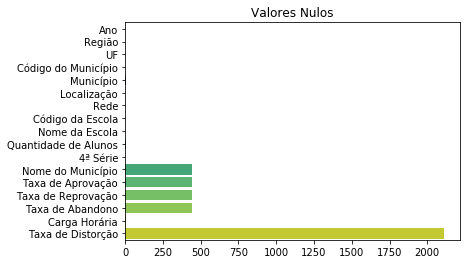

In [25]:
g = sns.barplot(x = df.isna().sum(), y = df.columns, palette = cat_pal)
g.set_title('Valores Nulos')

A bilbioteca `missingno` oferece algumas visualizações bem interessantes para valores nulos.

A seguinte, chamada de `matrix`, permite visualizar a dispersão dos valores nulos pelo conjunto de dados. As linhas brancas indicam onde estão faltando dados.

A vantagem desse tipo de visualização sobre a anterior é que percebemos que os dados que faltam nas colunas `Nome do Município`, `Taxa de Aprovação`, `Taxa de Reprovação` e `Taxa de Abandono` são relacionadas.

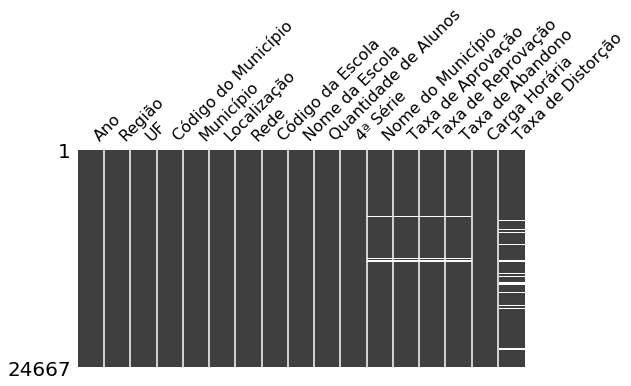

In [26]:
msno.matrix(df, figsize=(8, 4), sparkline=False)

O próximo preparativo para a análise é a importação do conjunto de dados do ENEM 2010.

In [27]:
df_enem = pd.read_csv(f'{gdrive}/source/microdados_enem_por_escola/DADOS/MICRODADOS_ENEM_ESCOLA.csv',
                      sep=';',
                      encoding = 'latin_1')
head_and_tail(df_enem)

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2014,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,145,0.0,136,93.79,647.29,604.88,592.34,629.14,718.53,NaN,NaN,NaN,61.6,86.03,95.4,4.6,0.0,Maior que 90 alunos
1,2015,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,137,0.0,130,94.89,652.34,591.64,604.53,627.66,732.00,NaN,NaN,Grupo 6,67.5,78.46,96.1,3.9,0.0,Maior que 90 alunos
2,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,NaN,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
3,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
4,2009,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,NaN,144,65.50,624.16,622.92,598.73,592.42,707.29,NaN,NaN,NaN,NaN,NaN,95.5,4.5,0.0,Maior que 90 alunos
172300,2013,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,213,2.0,147,69.01,496.43,445.09,477.62,483.17,503.86,NaN,NaN,NaN,91.8,NaN,83.1,9.1,7.8,Maior que 90 alunos
172301,2014,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,138,2.0,100,72.46,542.91,471.92,500.61,453.76,470.20,NaN,NaN,NaN,72.0,82.00,81.2,17.5,1.3,Maior que 90 alunos
172302,2015,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,198,8.0,152,76.77,540.94,458.71,497.75,428.90,517.24,NaN,NaN,Grupo 3,83.3,76.32,78.9,10.1,11.0,Maior que 90 alunos
172303,2014,53,DF,5300108,Brasília,53082001,COL IMPACTO,4,1,12,0.0,10,83.33,560.65,516.09,546.61,513.08,482.00,NaN,NaN,NaN,69.2,NaN,91.4,8.6,0.0,De 1 a 30 alunos
172304,2015,53,DF,5300108,Brasília,53082001,COL IMPACTO,4,1,28,0.0,20,71.43,585.70,492.47,550.83,464.84,578.00,NaN,NaN,Grupo 5,57.1,75.00,95.0,5.0,0.0,De 1 a 30 alunos


Este conjunto de dados é bem mais amigável ao pandas que os anteriores, e portanto, dispensa qualquer tratamento especial durante a importação.

In [28]:
df_enem.columns

Index(['NU_ANO', 'CO_UF_ESCOLA', 'SG_UF_ESCOLA', 'CO_MUNICIPIO_ESCOLA',
       'NO_MUNICIPIO_ESCOLA', 'CO_ESCOLA_EDUCACENSO', 'NO_ESCOLA_EDUCACENSO',
       'TP_DEPENDENCIA_ADM_ESCOLA', 'TP_LOCALIZACAO_ESCOLA', 'NU_MATRICULAS',
       'NU_PARTICIPANTES_NEC_ESP', 'NU_PARTICIPANTES', 'NU_TAXA_PARTICIPACAO',
       'NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT',
       'NU_MEDIA_RED', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 'INSE',
       'PC_FORMACAO_DOCENTE', 'NU_TAXA_PERMANENCIA', 'NU_TAXA_APROVACAO',
       'NU_TAXA_REPROVACAO', 'NU_TAXA_ABANDONO', 'PORTE_ESCOLA'],
      dtype='object')

No entanto, os nomes das colunas está em um padrão completamento diferentes dos anteriores.

Como pretendo mesclar estre conjunto com os anteriores, preciso antes reescrever o nome das colunas.

In [0]:
df_enem.columns = ['Ano', 'Código do UF', 'UF', 'Código do Município',
                   'Município', 'Código da Escola', 'Nome da Escola',
                   'Rede', 'Localização', 'Quantidade de Matriculas',
                   'Quantidade de Participantes Nec Esp', 
                   'Quantidade de Participantes', 'Taxa de Participação',
                   'Média Ciências da Natureza', 'Média Ciências Humanas', 
                   'Média Lingua Portuguesa', 'Média Matemática',
                   'Média Redação', 'Média Objetiva', 'Média Total', 'INSE',
                   'Adequação da Formação Docente', 'Taxa de Permanência', 
                   'Taxa de Aprovação','Taxa de Reprovação', 'Taxa de Abandono', 
                   'Porte da Escola']

Outra ação importante é manter apenas dados referentes ao ano de 2010, já que apenas esse ano está sendo analisado.

In [30]:
df_enem = df_enem[df_enem['Ano'] == 2010].reset_index(drop=True)
df_enem.tail()

,Ano,Código do UF,UF,Código do Município,Município,Código da Escola,Nome da Escola,Rede,Localização,Quantidade de Matriculas,Quantidade de Participantes Nec Esp,Quantidade de Participantes,Taxa de Participação,Média Ciências da Natureza,Média Ciências Humanas,Média Lingua Portuguesa,Média Matemática,Média Redação,Média Objetiva,Média Total,INSE,Adequação da Formação Docente,Taxa de Permanência,Taxa de Aprovação,Taxa de Reprovação,Taxa de Abandono,Porte da Escola
19686,2010,53,DF,5300108,Brasília,53027000,COL ALUB,4,1,110,NaN,108,98.2,614.46,543.42,573.76,590.07,679.17,NaN,NaN,NaN,NaN,NaN,94.0,5.2,0.8,Maior que 90 alunos
19687,2010,53,DF,5300108,Brasília,53038002,CEM DELTA,4,1,48,NaN,22,28.8,650.34,589.57,614.49,681.96,682.14,NaN,NaN,NaN,NaN,NaN,95.8,4.2,0.0,De 31 a 60 alunos
19688,2010,53,DF,5300108,Brasília,53051009,CEM JULIA KUBITSCHEK,2,1,103,NaN,49,38.0,512.19,468.21,521.63,492.39,568.37,NaN,NaN,NaN,NaN,NaN,71.5,14.6,13.9,Maior que 90 alunos
19689,2010,53,DF,5300108,Brasília,53056000,COL OLIMPO,4,1,32,NaN,29,90.6,708.72,654.78,634.64,745.78,734.48,NaN,NaN,NaN,NaN,NaN,94.9,5.1,0.0,De 31 a 60 alunos
19690,2010,53,DF,5300108,Brasília,53068181,CED 310 DE SANTA MARIA,2,1,36,NaN,12,33.3,518.04,433.93,508.94,450.28,568.75,NaN,NaN,NaN,NaN,NaN,56.1,25.7,18.2,De 31 a 60 alunos


Apenas 19691 linhas restaram, indicando que os dados do ENEM não estáo disponíveis para todas as escolas dos conjuntos anteriores.

Note também, que muitas colunas são redudantes considerando os dados anteriores, portanto, é necessário manter nesse conjunto apenas uma coluna que relacione os dois cojuntos (Código da Escola).

Algumas colunas não apresentam dados para o ano de 2010 e serão retiradas, são elas:
* Quantidade de Participantes Nec Esp; 
* Média Objetiva;
* Média Total;
* INSE;
* Adequação da Formação Docente.

In [0]:
df_enem = df_enem[['Código da Escola', 'Quantidade de Matriculas',  
                   'Quantidade de Participantes', 'Taxa de Participação',
                   'Média Ciências da Natureza', 'Média Ciências Humanas', 
                   'Média Lingua Portuguesa', 'Média Matemática',
                   'Média Redação','Porte da Escola']]

Observar a quantidade de nulos é importante para perceber se algum dado precisa ser tratado.

Text(0.5, 1.0, 'Valores Nulos')

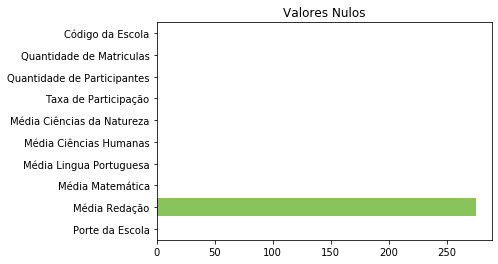

In [32]:
g = sns.barplot(x = df_enem.isna().sum(), y = df_enem.columns, palette = cat_pal)
g.set_title('Valores Nulos')

E novamente usar a matriz da bibliteca `missingno` para avaliar a relação dos valores ausentes.

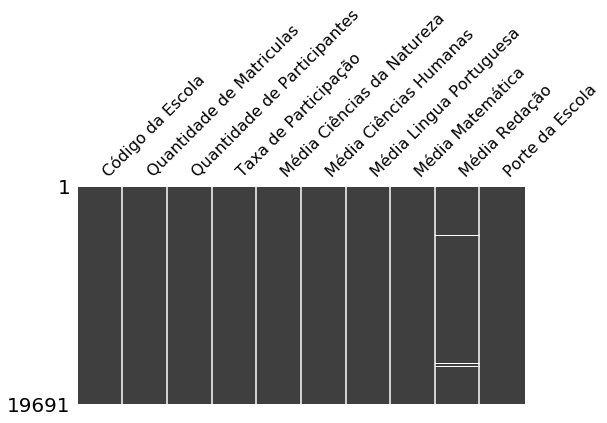

In [33]:
msno.matrix(df_enem, figsize=(8, 4), sparkline=False)

Quando o aluno zerou a prova, o resultado é apresentado como nulo. Então podemos substitui-lo por 0.

In [0]:
df_enem['Média Redação'] = df_enem['Média Redação'].fillna(0)

E finalmente mesclar o conjuntos de dados.

In [35]:
# the number of rows before merging
prev_shape = df.shape[0]
# merge both datasets
df = df.merge(df_enem, on='Código da Escola', how='outer')
# calculate how many lines were merged
print(f'{prev_shape+df_enem.shape[0]-df.shape[0]} lines were merged.')

19644 lines were merged.


O calculo da diferença indica que todas as linhas foram mescladas com sucesso.

Agora, com o dataframe mesclado, crio algumas colunas que  podem ser relevantes à análise.

Não existe um método único de calcular a nota do ENEM. A nota vai variar de acordo com os pesos definidos pela universidade para cada curso. Como estou a analisando o desempenho geral de todos os alunos do último ano, utilizarei uma média simples para o cálculo da nota.

Também crio uma coluna para a taxa de abstinência, que nada mais é que o oposto da taxa de participação.

In [0]:
# create a column with the average grade
df['Média ENEM'] = df[['Média Ciências da Natureza',
                       'Média Ciências Humanas', 
                       'Média Lingua Portuguesa', 
                       'Média Matemática',
                       'Média Redação']].mean(axis=1)

# create a column with the missing rate, that is the opposite of the attendance
df['Taxa de Abstinência'] = 100 - df['Taxa de Participação']



O próximo conjunto de dados a ser importado é o dos dados geográficos dos estados brasileiros.

In [37]:
gdf = geopandas.read_file(f'{gdrive}/source/br_states.json')
head_and_tail(gdf)

,id,name,geometry
0,AC,Acre,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,AL,Alagoas,"MULTIPOLYGON (((-35.90153 -9.86181, -35.90153 ..."
2,AP,Amapá,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,AM,Amazonas,"MULTIPOLYGON (((-53.62548 -26.88481, -53.61900..."
4,BA,Bahia,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."
22,RR,Roraima,"POLYGON ((-60.16886 5.22630, -60.16519 5.22605..."
23,SC,Santa Catarina,"MULTIPOLYGON (((-48.75514 -28.51041, -48.75459..."
24,SP,São Paulo,"MULTIPOLYGON (((-48.08236 -25.28431, -48.08236..."
25,SE,Sergipe,"MULTIPOLYGON (((-37.38458 -11.45986, -37.38458..."
26,TO,Tocantins,"POLYGON ((-48.35310 -5.17391, -48.32085 -5.201..."


Felizmente o conjunto de dados já está em um formato amigável e não exige muito trabalho. Porém novamente, como desejo mesclar os conjuntos de dados, é interessante renomear a coluna `id`para seguir o padrão adotado anteriormente.

Uma vez que já temos a coluna `id`, a coluna `name` pode ser dispensada.

Note também que a coluna `geometry` deve seguir com esse nome, pois o método `plot()` de um conjunto de dados do `geopandas` exige que esse seja o nome da coluna com o formato geométrico dos estados.

In [38]:
gdf = gdf[['id', 'geometry']]
# the geometry must be called geometry to the plot to work.
gdf.columns = ['UF', 'geometry']
gdf.tail()

,UF,geometry
22,RR,"POLYGON ((-60.16886 5.22630, -60.16519 5.22605..."
23,SC,"MULTIPOLYGON (((-48.75514 -28.51041, -48.75459..."
24,SP,"MULTIPOLYGON (((-48.08236 -25.28431, -48.08236..."
25,SE,"MULTIPOLYGON (((-37.38458 -11.45986, -37.38458..."
26,TO,"POLYGON ((-48.35310 -5.17391, -48.32085 -5.201..."


Agora que o cojunto de dados já está da maneira que desejo, basta uni-lo com o o restante dos dados.

In [39]:
gdf = gdf.join(df.groupby('UF').mean(), on='UF')
gdf.tail()

,UF,geometry,Ano,Código do Município,Código da Escola,Quantidade de Alunos,Taxa de Aprovação,Taxa de Reprovação,Taxa de Abandono,Carga Horária,Taxa de Distorção,Quantidade de Matriculas,Quantidade de Participantes,Taxa de Participação,Média Ciências da Natureza,Média Ciências Humanas,Média Lingua Portuguesa,Média Matemática,Média Redação,Média ENEM,Taxa de Abstinência
22,RR,"POLYGON ((-60.16886 5.22630, -60.16519 5.22605...",2010.0,1.400259e+06,1.404160e+07,17.634579,89.457944,4.662617,5.879439,4.212150,36.034951,111.236842,61.947368,49.450000,505.482895,451.068947,471.394211,460.101316,562.252895,490.060053,50.550000
23,SC,"MULTIPOLYGON (((-48.75514 -28.51041, -48.75459...",2010.0,4.209116e+06,4.206163e+07,26.407710,92.980876,3.401498,3.617627,3.966667,18.060667,89.740591,43.283602,54.734005,542.653132,494.485121,513.290349,521.025430,579.989503,530.288707,45.265995
24,SP,"MULTIPOLYGON (((-48.08236 -25.28431, -48.08236...",2010.0,3.533641e+06,3.522872e+07,29.958735,92.507913,4.836006,2.656081,4.858877,14.118646,101.524280,43.351096,46.958058,546.772361,491.264368,524.779192,525.836629,595.445799,536.819670,53.041942
25,SE,"MULTIPOLYGON (((-37.38458 -11.45986, -37.38458...",2010.0,2.802934e+06,2.802342e+07,28.283682,88.067949,4.546154,7.385897,4.664854,43.384279,108.235294,47.893048,44.889840,514.940749,459.387112,479.509091,465.675348,567.525294,497.407519,55.110160
26,TO,"POLYGON ((-48.35310 -5.17391, -48.32085 -5.201...",2010.0,1.711903e+06,1.702387e+07,24.896183,91.658015,4.287405,4.054580,4.486260,34.570356,88.782123,41.726257,46.875419,504.553799,451.157151,465.635642,453.959106,545.024749,484.066089,53.124581


Com isso, chega ao fim a importação de dados. Note que importar pode ser uma tarefa bem mais difícil que parece, quando trabalhando com diferentes fontes. 

Os dados apresentados pelo INEP estavam muito organizados e completos e facilitaram o processo. O processo só não foi mais simples foi os dados estavam espalhados em 5 arquivos diferentes e em diferente formatações.

# Análise de Dados
Antes de começar a visualizar os dados é imporante garantir que as colunas estão em uma formatação adequada.

In [0]:
# make sure the data type is correct
df['Região'] = df['Região'].astype('category')
df['UF'] = df['UF'].astype('category')
df['Código do Município  '] = df['Código do Município'].astype('object')
df['Município'] = df['Município'].astype('object')
df['Localização'] = df['Localização'].astype('category')
df['Rede'] = df['Rede'].astype('category')
df['Código da Escola'] = df['Código da Escola'].astype('object')
df['Nome da Escola'] = df['Nome da Escola'].astype('object')
df['Porte da Escola'] = df['Porte da Escola'].astype('category')

Gosto de dar uma olhada nas distribuições de todas as variáveis numéricas antes de prosseguir com a análise. Isso é nada mais que uma última verificação para garantir que não há nada de errado com os dados.

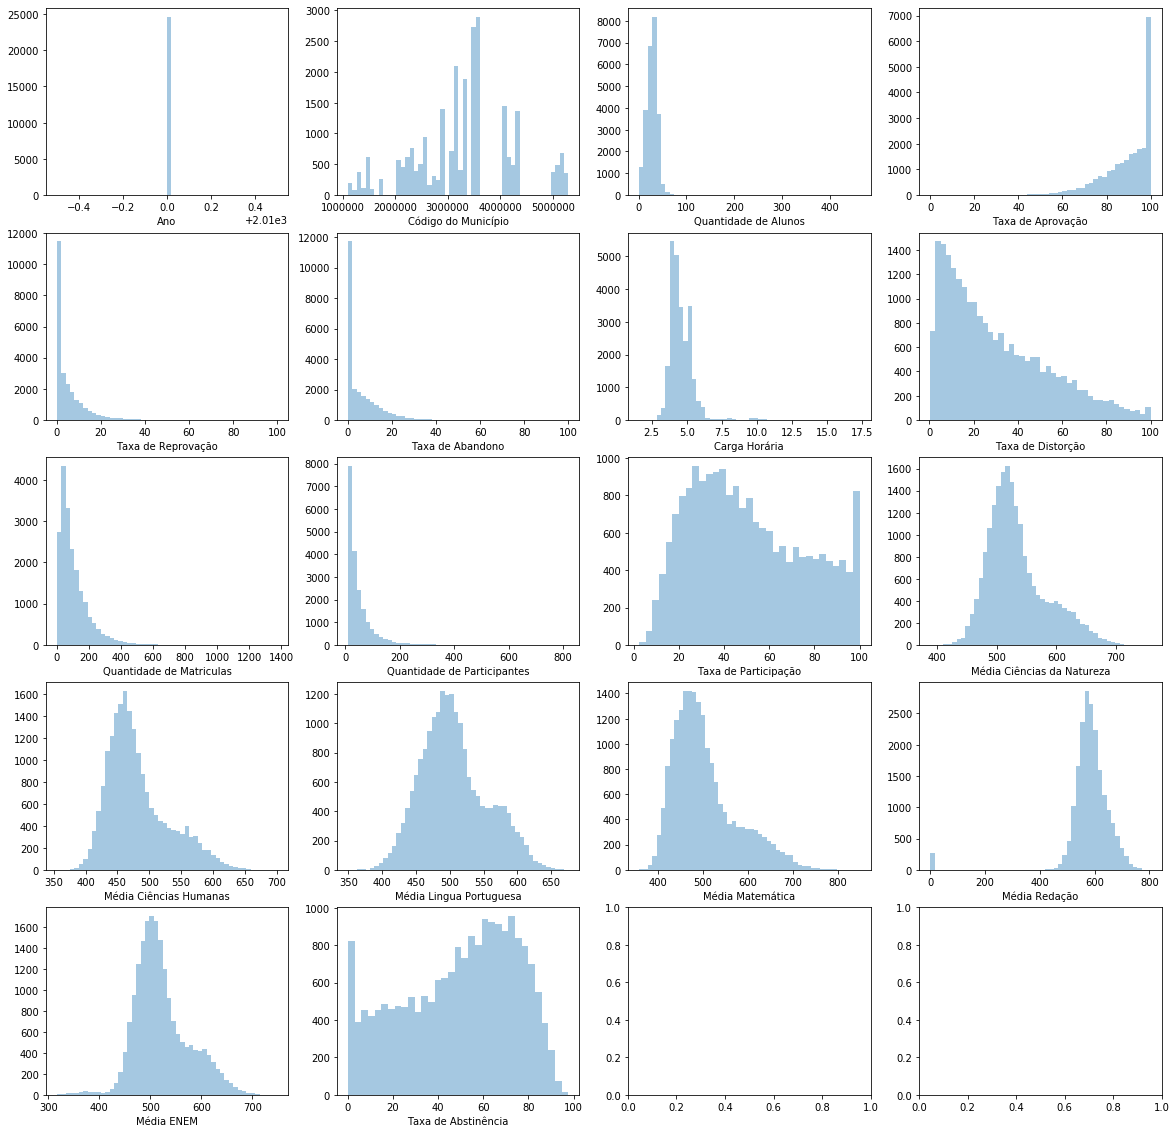

In [41]:
cols = df.select_dtypes(['number'])
f, axes = plt.subplots(5, 4, figsize=(20, 20))
for ax, col in zip(axes.flat, cols):
    sns.distplot(df[col].dropna(), kde=False, ax=ax)

Algumas colunas apresentam muitos outliers. Eu acredito que esses valores não ajudam esta análise. Eu estou interessado em uma visão mais geral do dados, e esses valores específicos distorcem os resultados. Portanto eu prefiro abrir mão desses outliers.

Perder dados em uma análise de dados pode parecer ruim a uma primeira vista, mas acredito que isso pode ser melhor quando estes mesmos dados apenas distorcem o resultado da análise.

In [0]:
def remove_outliers(data, series, conf_int, kind):
    
    # remove the smallest values
    if 'bottom' in kind:
        data = data[data[series] > data[series].quantile(1 - conf_int)]
    # remove the biggest values
    elif 'top' in kind:
        data = data[data[series] < data[series].quantile(conf_int)]
    # remove both the smallest and biggest values
    elif 'both' in kind:
        data = data[(data[series] > data[series].quantile(1 - conf_int)) &\
                    (data[series] < data[series].quantile(conf_int))]
    return data

In [0]:
df = remove_outliers(df, 'Quantidade de Alunos', 0.995, 'top')
df = remove_outliers(df, 'Taxa de Aprovação', 0.995, 'bottom')
df = remove_outliers(df, 'Taxa de Reprovação', 0.995, 'top')
df = remove_outliers(df, 'Taxa de Abandono', 0.995, 'top')
df = remove_outliers(df, 'Carga Horária', 0.995, 'both')
df = remove_outliers(df, 'Taxa de Distorção', 0.995, 'top')
df = remove_outliers(df, 'Quantidade de Matriculas', 0.995, 'top')
df = remove_outliers(df, 'Quantidade de Participantes', 0.995, 'top')
df = remove_outliers(df, 'Taxa de Participação', 0.995, 'bottom')

Visualizo novamente todas as variáveis numéricas para verificar como estão os dados.

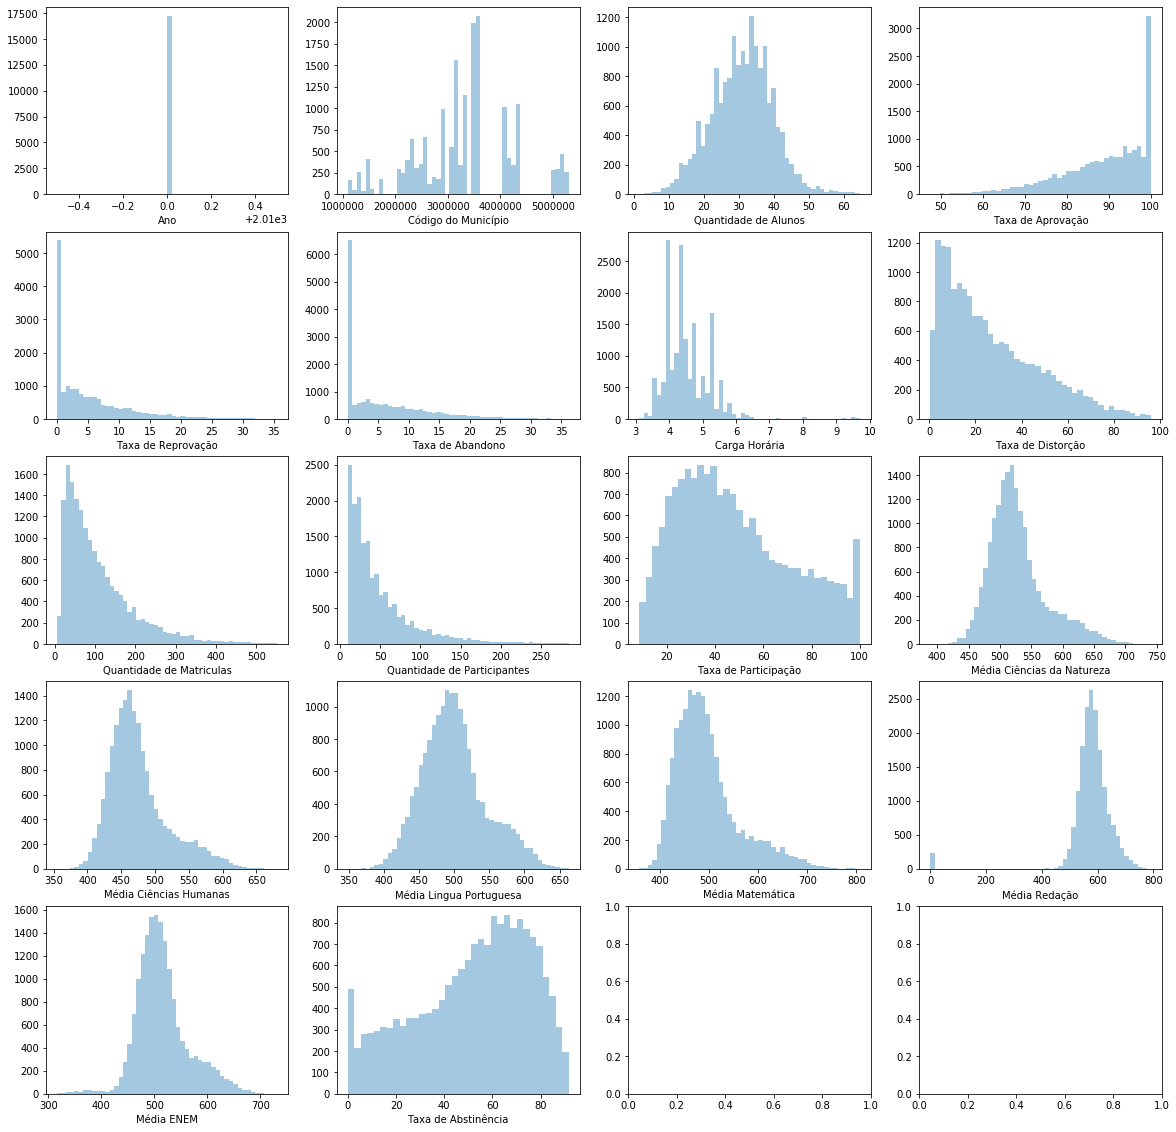

In [44]:
cols = df.select_dtypes(['number'])
f, axes = plt.subplots(5, 4, figsize=(20, 20))
for ax, col in zip(axes.flat, cols):
    sns.distplot(df[col].dropna(), kde=False, ax=ax)

Pela mesma razão, também dou uma olhada nas colunas categóricas.

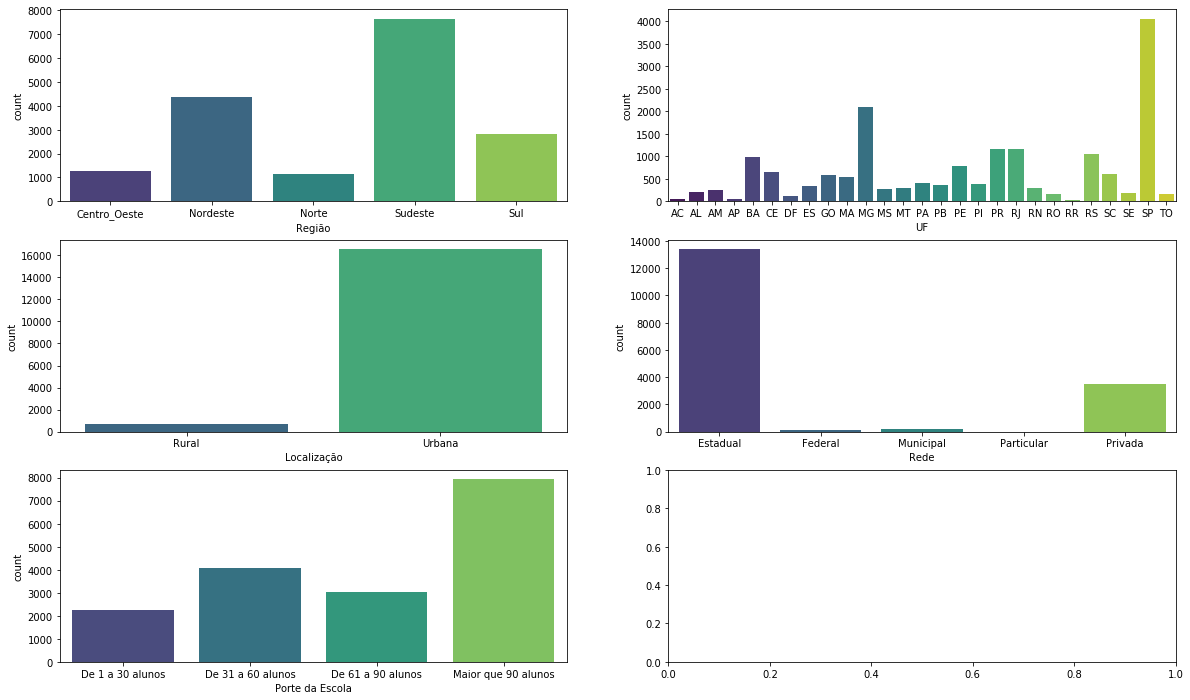

In [45]:
cols = df.select_dtypes(['category'])
f, axes = plt.subplots(3, 2, figsize=(20, 12))
for ax, col in zip(axes.flat, cols):
    sns.countplot(df[col].dropna(), ax=ax, palette=cat_pal)

Há uma redundância na coluna `Rede`. Para essa análise, `Particular` e `Privada` tem o mesmo sentido e devem ser unidas.

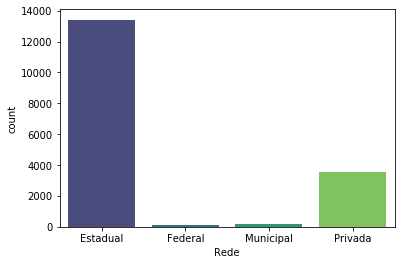

In [46]:
df['Rede'] = df['Rede'].replace('Particular', 'Privada')
df['Rede'] = df['Rede'].cat.remove_unused_categories()
sns.countplot(df['Rede'], palette=cat_pal)

Agora finalmente podemos analisar os dados. Começaremos comparando as ditribuições.

In [0]:
def ridgeplot(data, row, kde, title=None):
    # Plot based on Seaborn's example:
    # https://seaborn.pydata.org/examples/kde_ridgeplot.html
    
    if title is None:
        title = kde

    with sns.axes_style('white', rc={"axes.facecolor": (0, 0, 0, 0)}):
    
        # Initialize the FacetGrid object

        if len(data[row].unique()) > 1:
            s = 1
        else:
            s = 2

        g = sns.FacetGrid(data, row=row, hue=row, 
                          aspect=8/s, height=1*s, palette=cat_pal)
        # Draw the densities in a few steps
        g.map(sns.kdeplot, kde, shade=True, lw=0, alpha=1)
        g.map(sns.kdeplot, kde, color='w', lw=2)
        g.map(plt.axhline, y=0, lw=2)


        # Define and use a simple function to label the plot in axes coordinates
        def label(color, label):
            ax = plt.gca()
            ax.text(0, .1, label, color=color, fontweight="bold",
                    ha="left", va="center", transform=ax.transAxes)


        g.map(label)

        # Set the subplots to overlap
        g.fig.subplots_adjust(hspace=-.25)

        # Remove axes details that don't play well with overlap
        g.set_titles("")
        g.set(yticks=[])
        g.despine(bottom=True, left=True)
        g.set_axis_labels(title,'')

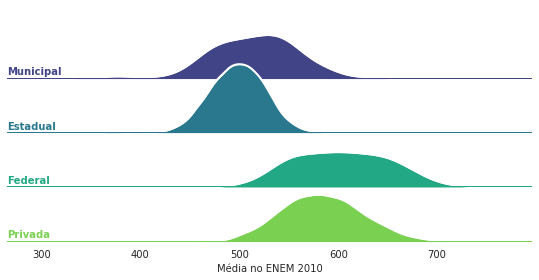

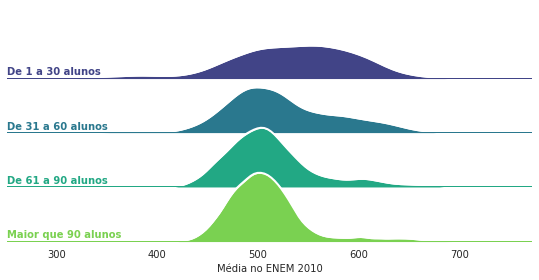

In [48]:
order = ['Municipal', 'Estadual', 'Federal', 'Privada']
df['Rede'] = df['Rede'].cat.set_categories(order, ordered=True)
ridgeplot(df, 'Rede', 'Média ENEM', 'Média no ENEM 2010')
ridgeplot(df, 'Porte da Escola', 'Média ENEM', 'Média no ENEM 2010')

É notável que as escolas federais tem o melhor desempenho no ENEM. Também percebe-se que quanto menor a quantidade de alunos, melhor a nota no ENEM.

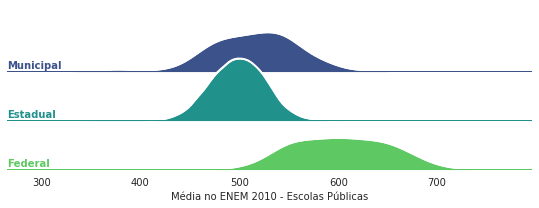

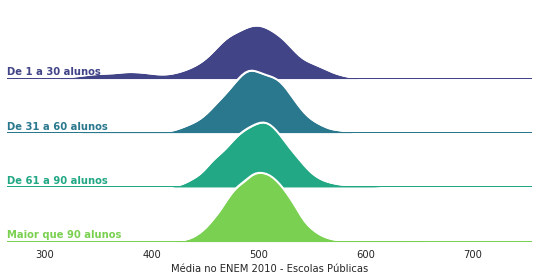

In [49]:
temp = df[df['Rede'] != 'Privada']
temp['Rede'] = temp['Rede'].cat.remove_unused_categories()
ridgeplot(temp, 'Rede', 'Média ENEM', 'Média no ENEM 2010 - Escolas Públicas')
ridgeplot(temp, 'Porte da Escola', 'Média ENEM', 'Média no ENEM 2010 - Escolas Públicas')

Porém quando filtramos apenas escolas públicas, nota-se pouca influência da quantidade de alunos.

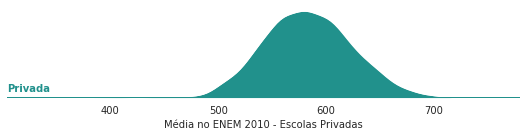

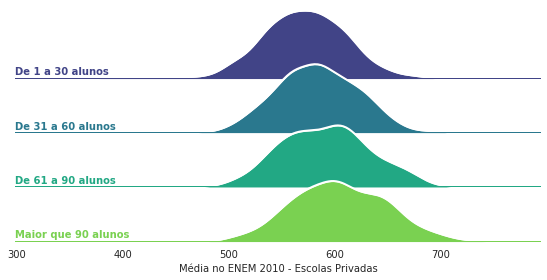

In [50]:
temp = df[df['Rede'] == 'Privada']
temp['Rede'] = temp['Rede'].cat.remove_unused_categories()
ridgeplot(temp, 'Rede', 'Média ENEM', 'Média no ENEM 2010 - Escolas Privadas')
ridgeplot(temp, 'Porte da Escola', 'Média ENEM', 'Média no ENEM 2010 - Escolas Privadas')

E quando filtramos apenas escolas privadas, as escolas maiores (com mais alunos) tem melhor desempenho.

Portanto, aquele melhor desempenho de 1 a 30 aluno tem resultado mascarado pela má distribuição entre particular e privado nessa categoria.

Se os dados fossem analisados poderamos crer que essas escolas estão tendo melhor desemepenho, o que não é verdade.

Agora avaliaremos a taxa de aprovação.

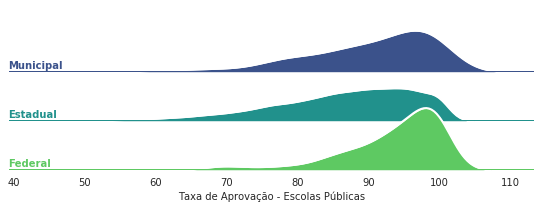

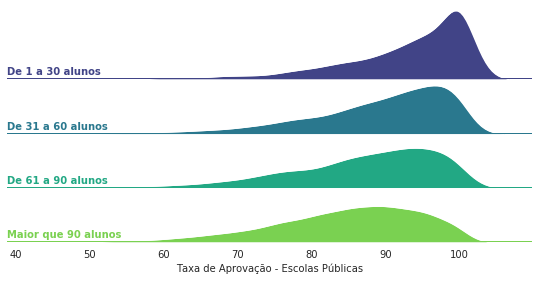

In [52]:
temp = df[df['Rede'] != 'Privada']
temp['Rede'] = temp['Rede'].cat.remove_unused_categories()
ridgeplot(temp, 'Rede', 'Taxa de Aprovação', 'Taxa de Aprovação - Escolas Públicas')
ridgeplot(temp, 'Porte da Escola', 'Taxa de Aprovação', 'Taxa de Aprovação - Escolas Públicas')

Logo de cara notamos que a taxa de reprovação é muito mais alta no nível munícipal e estadual em relação ao federal. Os alunos dessas escolas estão com muita dificuldade de aprovação.

Porém muito curiosamente, é notável uma grande diferença na taxa de aprovação pelo tamanho da escola.

Escolas pequenas tem taxa de aprovação muito maior. Mas conforme visto nos gráficos anteriores, isso não indica uma maior qualidade de ensino, pois a média no ENEM dessas escolas é até menor. Na verdade, isso mostra que essas escolas são **menos exigentes** que escolas com muito alunos.

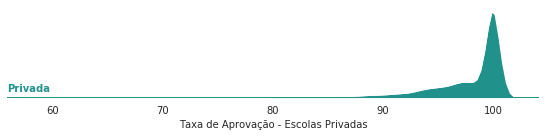

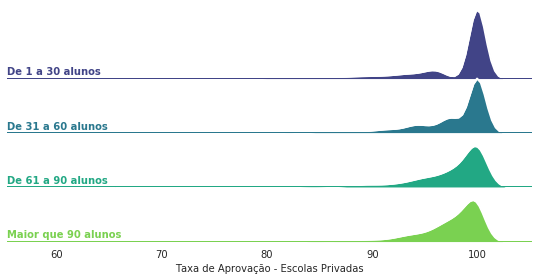

In [53]:
temp = df[df['Rede'] == 'Privada']
temp['Rede'] = temp['Rede'].cat.remove_unused_categories()
ridgeplot(temp, 'Rede', 'Taxa de Aprovação', 'Taxa de Aprovação - Escolas Privadas')
ridgeplot(temp, 'Porte da Escola', 'Taxa de Aprovação', 'Taxa de Aprovação - Escolas Privadas')

O mesmo fenômeno é observado em escolas privadas.

Agora será avaliado os dados referentes quantidade de aluno e carga horária das turmas.

In [0]:
def heatmap(df, x, y, z, x_bins_qty, y_bins_qty, x_dec, y_dec, conf_int):
    
    # remove nulls from the dependent variable and assignt it to a new pointer
    # because we don't want to mess up with the original data.
    data = df.dropna(axis=0, subset=[z])

    
    # Gets max and min value to create the bins for X
    x_max = data[x].quantile(conf_int)
    x_min = data[x].quantile(1-conf_int)
    x_bins = np.linspace(start=x_min, stop=x_max, num=x_bins_qty+1)
    # Round the floats
    x_labels = np.around(x_bins[1:], x_dec)
    # If the user chooses 0 decimals, converts it to int.
    if x_dec == 0: 
        x_labels = x_labels.astype(int)
    # Cut the series into beans
    x_series = pd.cut(data[x], bins=x_bins, labels=x_labels)
    
    # Gets max and min value to create the bins for Y
    y_max = data[y].quantile(conf_int)
    y_min = data[y].quantile(1-conf_int)
    y_bins = np.linspace(start=y_min, stop=y_max, num=y_bins_qty+1)
    # Round the floats
    y_labels = np.around(y_bins[1:], y_dec)
    # If the user chooses 0 decimals, converts it to int.
    if y_dec == 0: 
        y_labels = y_labels.astype(int)
    # Cut the series into beans
    y_series = pd.cut(data[y], bins=y_bins, labels=y_labels)
    
    # The z series demands no work, but it takes the max and min to user it
    # later when settingthe heatmap bounds.
    z_series = data[z]
    
    # Now it's necessary to manipulate data to a format acceptable by seaborn's
    # heatmap. To not mess up with the dataset, a new dataframe  is created.
    hm = pd.DataFrame({x: x_series, y: y_series, z: z_series})
    # group all the bins by the bin, to create single cases
    hm = hm.groupby([x,y], as_index=False).mean()
    # pivot data (transoform x values in columns)
    hm = hm.pivot(index = y, columns = x, values = z)
    
    # sort the values to appear in a natural way in the axis (ascending away 
    # from the axis origin)
    hm = hm.sort_index(axis=0, ascending=False)
    hm = hm.sort_index(axis=1, ascending=True)
    
    # plots a heatmap with  red for low values and green for high values
    g = sns.heatmap(hm, cmap = 'RdYlGn')
    # keeps the Y values in horizontal, for an easy reading
    g.set_yticklabels(g.get_yticklabels(), rotation=0)
    # adds a title
    g.set_title(z)

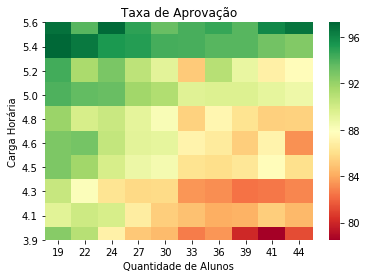

In [55]:
heatmap(df = df, 
        x = 'Quantidade de Alunos', 
        y = 'Carga Horária', 
        z = 'Taxa de Aprovação', 
        x_bins_qty = 10, 
        y_bins_qty = 10, 
        x_dec = 0, 
        y_dec = 1, 
        conf_int=0.95)

O mapa de calor aponta duas tendências.

* Quanto menos alunos, maior a taxa de aprovação.
* Quanto mais horas, maiora taxa de aprovação.

Quanto menos o aluno precisa dividir a atenção, e por mais horas, maior será sua chance de aprovação.

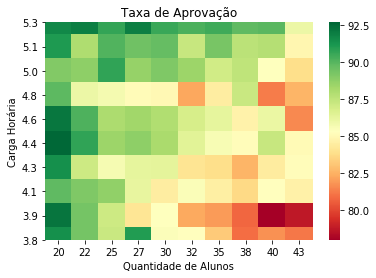

In [56]:
temp = df[df['Rede'] != 'Privada']
heatmap(df = temp, 
        x = 'Quantidade de Alunos', 
        y = 'Carga Horária', 
        z = 'Taxa de Aprovação', 
        x_bins_qty = 10, 
        y_bins_qty = 10, 
        x_dec = 0, 
        y_dec = 1, 
        conf_int=0.95)

Isso fica bem claro para escolas públicas.

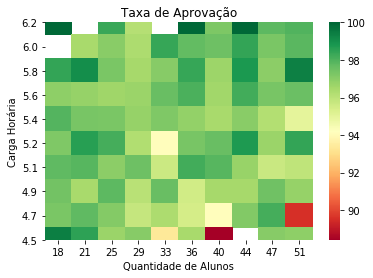

In [57]:
temp = df[df['Rede'] == 'Privada']
heatmap(df = temp, 
        x = 'Quantidade de Alunos', 
        y = 'Carga Horária', 
        z = 'Taxa de Aprovação', 
        x_bins_qty = 10, 
        y_bins_qty = 10, 
        x_dec = 0, 
        y_dec = 1, 
        conf_int=0.95)

Porém este efeito não é observado em escolas particulares.

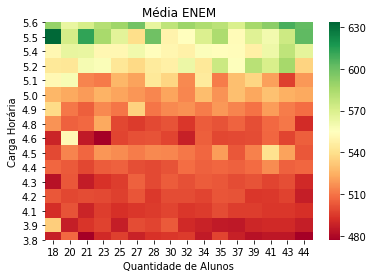

In [58]:
heatmap(df = df, 
        x = 'Quantidade de Alunos', 
        y = 'Carga Horária', 
        z = 'Média ENEM', 
        x_bins_qty = 16, 
        y_bins_qty = 16, 
        x_dec = 0, 
        y_dec = 1, 
        conf_int=0.95)

Quando analisamos a média no ENEM. O efeito da carga horária é claro, quanto mais horas os alunos passam em sala de aula, melhor será o resultado.

Porém a quantidade de alunos por sala parece não influênciar.

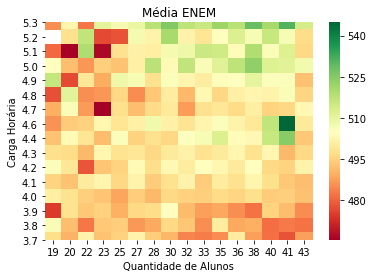

In [59]:
temp = df[df['Rede'] != 'Privada']
heatmap(df = temp, 
        x = 'Quantidade de Alunos', 
        y = 'Carga Horária', 
        z = 'Média ENEM', 
        x_bins_qty = 16, 
        y_bins_qty = 16, 
        x_dec = 0, 
        y_dec = 1, 
        conf_int=0.95)

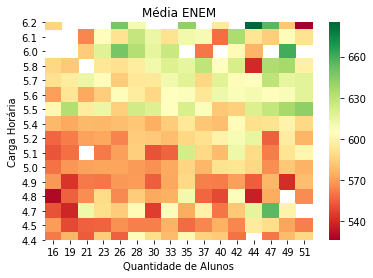

In [60]:
temp = df[df['Rede'] == 'Privada']
heatmap(df = temp, 
        x = 'Quantidade de Alunos', 
        y = 'Carga Horária', 
        z = 'Média ENEM', 
        x_bins_qty = 16, 
        y_bins_qty = 16, 
        x_dec = 0, 
        y_dec = 1, 
        conf_int=0.95)

Agora vamos analisar o desempenho por estado.

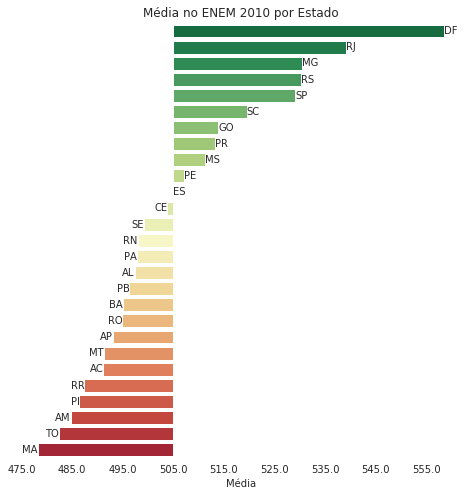

In [61]:
def div_bars(data, x, y, palette, figsize, xlabel, title):
    with sns.axes_style('white'):
        # group data by the y variable
        temp = data.groupby(by=y, as_index=False).mean()
        # measure the average of the x variable
        avg = temp[x].mean()
        # this is done to center the x axis aroud the average
        temp[x] = temp[x] - avg
        # sort values from the biggest to the lowest
        temp = temp.sort_values(x, ascending=False).reset_index()
        # Creates a figure
        plt.figure(figsize=figsize)
        # Plots a horizontal bar plot
        g = sns.barplot(data=temp, y=y, x=x, orient='h', 
                        palette = palette, order=temp[y])
        # draw the plot, this is necessary to get the ticks later
        plt.draw()
        # we don't want tho show the difference from the average, so we add the
        # average to the ticks, so it show the absolute values
        g.set_xticklabels(np.rint(g.get_xticks()+avg))
        sns.despine(ax=g, left=True, bottom=True)
        for i, row in temp.iterrows():
            if row[x] < 0:
                ha = 'right'
            else:
                ha = 'left'
            g.text(row[x], i, row[y], va='center', ha=ha)
        g.set(xlabel=xlabel, ylabel='', yticks=[], title=title)
        return g

div_bars(df, 'Média ENEM', 'UF', f'{div_pal}_r', (8,8), 'Média', 'Média no ENEM 2010 por Estado')

É curioso ver que o estado mais rico da federação não está em primeiro no ranking. Porém fica claro que a média do ENEM pode ser separado por regiões no Brasil.

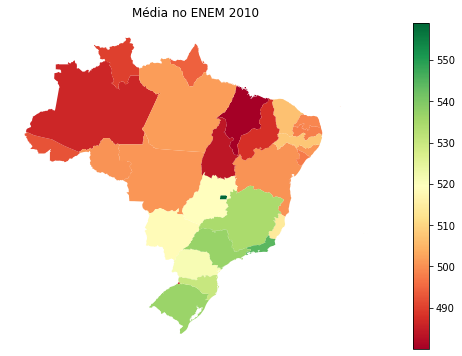

In [62]:
def plot_map(data, column, title, palette, figsize):
    # creates a subplot
    fig, ax = plt.subplots(1, figsize=figsize)
    # gets max and min values for the scale construction
    vmin, vmax = data[column].min(), data[column].max()
    # Plots. Notice that it is necessary to have a column called `geometry` in
    # in the geodataframe.
    data.plot(column=column, cmap=palette, ax=ax)
    # Remove borders
    ax.axis('off')
    # Set a title
    ax.set_title(title)
    # Create a color scale
    sm = plt.cm.ScalarMappable(cmap=palette, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

plot_map(gdf, 'Média ENEM', 'Média no ENEM 2010', div_pal, (10,6))

Os estados do sul e sudeste apresentam desempenho muito superior em relacão aos do centro-oeste, norte e nordeste.

Por fim, será analisado afinal, o que é que faz diferença na hora de tirar uma por uma boa nota no ENEM.

In [63]:
temp = df.copy()
catcols = temp.select_dtypes(['category']).columns
for col in catcols:
    temp[col] = temp[col].cat.codes
x = temp.select_dtypes(['number'])
drop = ['Média Ciências da Natureza',
        'Média Ciências Humanas',
        'Média Lingua Portuguesa',
        'Média Matemática',	
        'Média Redação',	
        'Média ENEM']
x = x.drop(drop, axis=1)
y = temp['Média ENEM']
regressor = RandomForestRegressor(n_estimators=100, max_features= 'auto')
cv = cross_validate(regressor, x, y, cv=5, return_estimator=True)
print(f'The average r2 was {cv["test_score"].mean()}')
idx = np.argmax(cv['test_score'])
regressor = cv['estimator'][idx]
feature_importance = regressor.feature_importances_

The average r2 was 0.6511032426266025


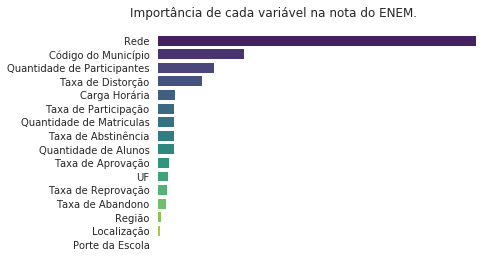

In [64]:
fi = pd.DataFrame({'col': x.columns,
                   'importance': feature_importance})
fi = fi.sort_values(by='importance', ascending=False)
fi = fi[fi['importance'] > 0]

with sns.axes_style('white'):
    g = sns.barplot(data=fi, x='importance', y='col', palette=seq_pal)
    g.set_frame_on(False)
    g.set(xticks=[])
    g.set_ylabel('')    
    g.set_xlabel('')
    g.set_title('Importância de cada variável na nota do ENEM.')
    plt.title('Importância de cada variável na nota do ENEM.', x =0.5-0.15, y=1+0.05)

# Conclusão
O principal fator na formação de um aluno e consequentemente na sua nota no ENEM é a rede de sua  escola.

Os alunos de escola privada ou federal tem ampla vantagem nesse quesito.

Após isso, o munício e o tamanho da escola são fatores formadores de umaboa nota.

Por exemplo, quanto mais rico o município e quanto maior a escola, maior a chance de o aluno ter uma boa nota no ENEM.